In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.svm import SVC

In [28]:
train_source = 'dataset/adult_preprocessed.csv'

test_source = 'dataset/adult_test_preprocessed.csv'


In [29]:
train_data = pd.read_csv(train_source, sep=r'\s*,\s*', engine='python')
test_data = pd.read_csv(test_source, sep=r'\s*,\s*', engine='python')


In [30]:
# Classify attributes into numbers and strings
def category_attribute(dataset, list, num_list, str_list): 
    for attribute in list:
        #print(feature, type(dataset[feature][1]))
        if type(dataset[attribute][1]) == str:
            str_list.append(attribute)
        else:
            num_list.append(attribute)
    return num_list, str_list

numerical_attribute_list = []
str_attribute_list = []

attribute_list = pd.read_csv(train_source, nrows=0)
print(attribute_list)
numerical_attribute_list, str_attribute_list = category_attribute(train_data, attribute_list, numerical_attribute_list, str_attribute_list)

Empty DataFrame
Columns: [age, workclass, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [31]:
# train_data normalization
le=LabelEncoder()
for i in str_attribute_list:
    train_data[i]=le.fit_transform(train_data[i])
#print(train_data)

# test_data normalization
le=LabelEncoder()
for i in str_attribute_list:
    test_data[i]=le.fit_transform(test_data[i])
#print(train_data)

In [32]:
# split data & label (train)
x_train = train_data.iloc[:,0:13]
y_train = train_data.iloc[:,13]
# split data & label (test)
x_test = test_data.iloc[:,0:13]
y_test = test_data.iloc[:,13]

In [33]:
#standardizing the input feature
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train
x_test = sc.fit_transform(x_test)
x_test

array([[ 0.04279571,  2.93600035, -0.34986472, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 0.88028814,  1.88768202, -0.34986472, ..., -0.21858598,
        -2.3315307 ,  0.26492394],
       [-0.03333996, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       ...,
       [ 1.48937355, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.17476277, ..., -0.21858598,
        -1.74721307,  0.26492394],
       [ 1.0325595 ,  0.83936369,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394]])

In [34]:
svm = SVC(C=5, kernel='rbf', probability=True)
svm.fit(x_train, y_train)

SVC(C=5, probability=True)

In [35]:
#svm.predict(x_test)
y_pred=svm.predict(x_test)
y_pred_new =(y_pred>0.5)
y_pred_new

array([False, False, False, ..., False, False,  True])

In [36]:
cm = confusion_matrix(y_test, y_pred_new)
print(cm)

[[21415  1239]
 [ 3008  4500]]


In [37]:
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred_new)

# Precision: TP / (TP + FP)
precision = precision_score(y_test, y_pred_new)

# Recall: TP / (TP + FN)
recall = recall_score(y_test, y_pred_new)

# F1-score: (2 * Precision * Recall) / (Precision + Recall))
f1_score = f1_score(y_test, y_pred_new)

# AUC 需要原始的預測概率(y_pred)而不是二元的預測結果(y_pred_new)
# 假設 y_pred 是模型預測的概率值
auc = roc_auc_score(y_test, y_pred)

def res_print():
    Item = ['Accurancy', 'Precision', 'Recall', 'F1-score', 'AUC']
    Value = [accuracy, precision, recall, f1_score, auc]
    for i in range(len(Item)):
        print((Item[i] + ':').rjust(10), "%.3f" % Value[i])
res_print()

Accurancy: 0.859
Precision: 0.784
   Recall: 0.599
 F1-score: 0.679
      AUC: 0.772


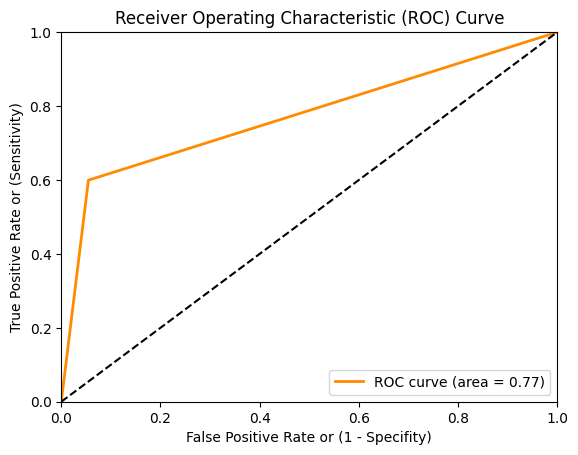

In [38]:
# AUC 需要原始的預測概率(y_pred)而不是二元的預測結果(y_pred_new)
# 假設 y_pred 是模型預測的概率值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# 繪製 ROC 曲線
def plot_roc_curve(fpr, tpr): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % auc) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

plot_roc_curve(fpr, tpr)
plt.show()